In [1]:
#Libraries 
#eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#split the datatset
from sklearn.model_selection import train_test_split

#preprocessing
from sklearn.preprocessing import LabelEncoder

# model
from sklearn.linear_model import LinearRegression

#pickle
import pickle

#model testing
from sklearn.metrics import mean_squared_error, r2_score

#time stamp
import time 
print("last update", time.asctime())

last update Fri Sep 26 17:23:04 2025


# Shoes size prediction (Machine Learning/Recognition)

![Machine Learning](assets/ml.jpeg)

# 1. Formulate the Problem


## Problem Definition
 This problem is to predict the shoe size based on features such as Age, Height, and Gendrr.
>This is essentially a reggression problem, where the target variable is continuous. The goal is to build
Inputs(Features):
* Age
*Height 
* Gender

Output(Target):
*Shoe size


# 2.Collect as much data as possible
Dataset
we are doing the project in navttc class.

Data Description

In [2]:
#read the dataset
df = pd.read_csv('datasets/shoes_size_age_height_gender_size.csv')
df.head(1)

,Age,Height,Gender,ShoeSize
0,12,150,Female,35


# 3. Prepare and Analyis data

In [3]:
#Shape
df.shape

(99, 4)

In [4]:
#describe
df.describe()

,Age,Height,ShoeSize
count,99.000000,99.000000,99.000000
mean,31.464646,167.707071,40.808081
std,13.878712,11.719731,3.705145
min,12.000000,140.000000,33.000000
25%,18.000000,160.000000,38.000000
50%,30.000000,168.000000,41.000000
75%,42.000000,176.500000,44.000000
max,60.000000,190.000000,48.000000


In [5]:
# check info about dataset
df.info

<bound method DataFrame.info of     Age  Height  Gender  ShoeSize
0    12     150  Female        35
1    14     155  Female        36
2    13     152  Female        35
3    15     160  Female        37
4    16     162  Female        38
..  ...     ...     ...       ...
94   45     180  Female        44
95   48     182  Female        44
96   50     185  Female        45
97   55     182  Female        44
98   60     180  Female        43

[99 rows x 4 columns]>

In [6]:
#check null values
df.isna().sum()

Age         0
Height      0
Gender      0
ShoeSize    0
dtype: int64

In [7]:
#age unique values
df['Age'].value_counts()

30    5
50    5
45    5
42    5
40    5
37    5
35    5
32    5
14    5
28    5
25    5
22    5
20    5
18    5
16    5
15    5
55    5
48    5
12    3
13    3
60    3
Name: Age, dtype: int64

In [8]:
#gender
df['Gender'].value_counts()

Female    60
Male      39
Name: Gender, dtype: int64

In [9]:
#height
df['Height'].value_counts()

160    8
165    8
170    7
172    7
162    6
155    6
180    5
185    5
168    5
182    5
178    4
150    4
175    4
158    4
152    4
188    2
190    2
145    2
148    2
167    2
174    2
176    2
187    1
140    1
177    1
Name: Height, dtype: int64

In [10]:
#shoe size
df['ShoeSize'].value_counts()

41    10
38     9
40     9
43     9
39     8
44     8
37     7
42     7
36     6
46     6
35     5
45     5
47     5
34     2
48     2
33     1
Name: ShoeSize, dtype: int64

# Visualization

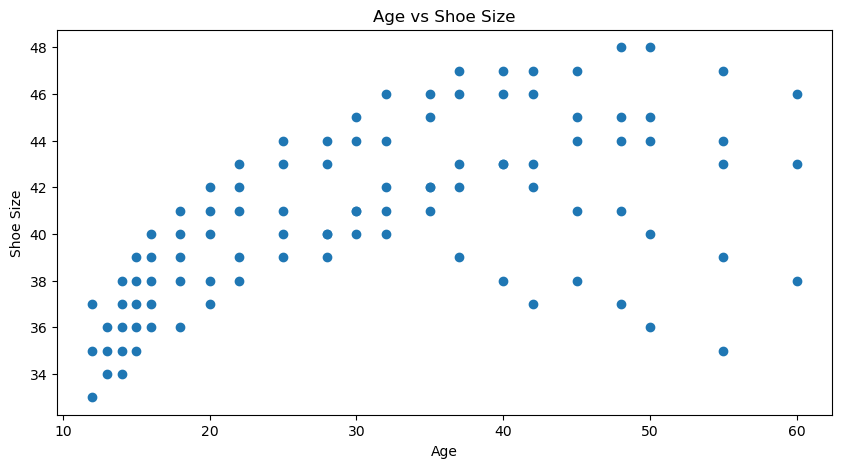

In [11]:
#age vs shoe size
plt.figure(figsize=(10,5))
plt.scatter(df['Age'],df['ShoeSize'])
plt.xlabel("Age")
plt.ylabel("Shoe Size")
plt.title("Age vs Shoe Size")
plt.savefig("assets/age_shoeSize.png")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

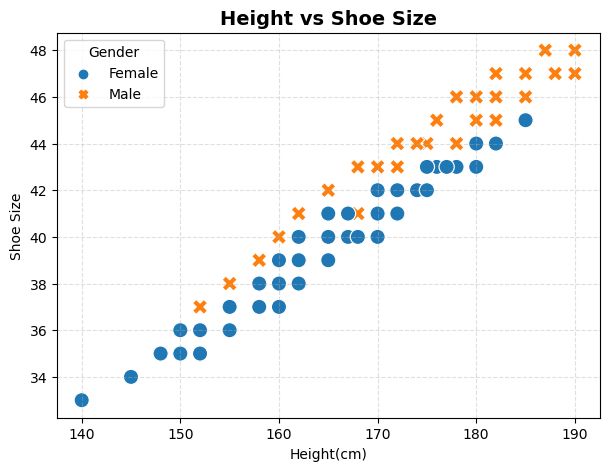

In [12]:
# Height and Shoe size
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Height", y="ShoeSize", hue="Gender", style="Gender", s=120)


plt.title("Height vs Shoe Size", fontsize=14, fontweight="bold")
plt.xlabel("Height(cm)")
plt.ylabel("Shoe Size")
plt.grid(True,linestyle="--",alpha=0.4)

plt.savefig("assets/height_vs_shoesize.png", dpi=300,bbox_inches="tight")
plt.show


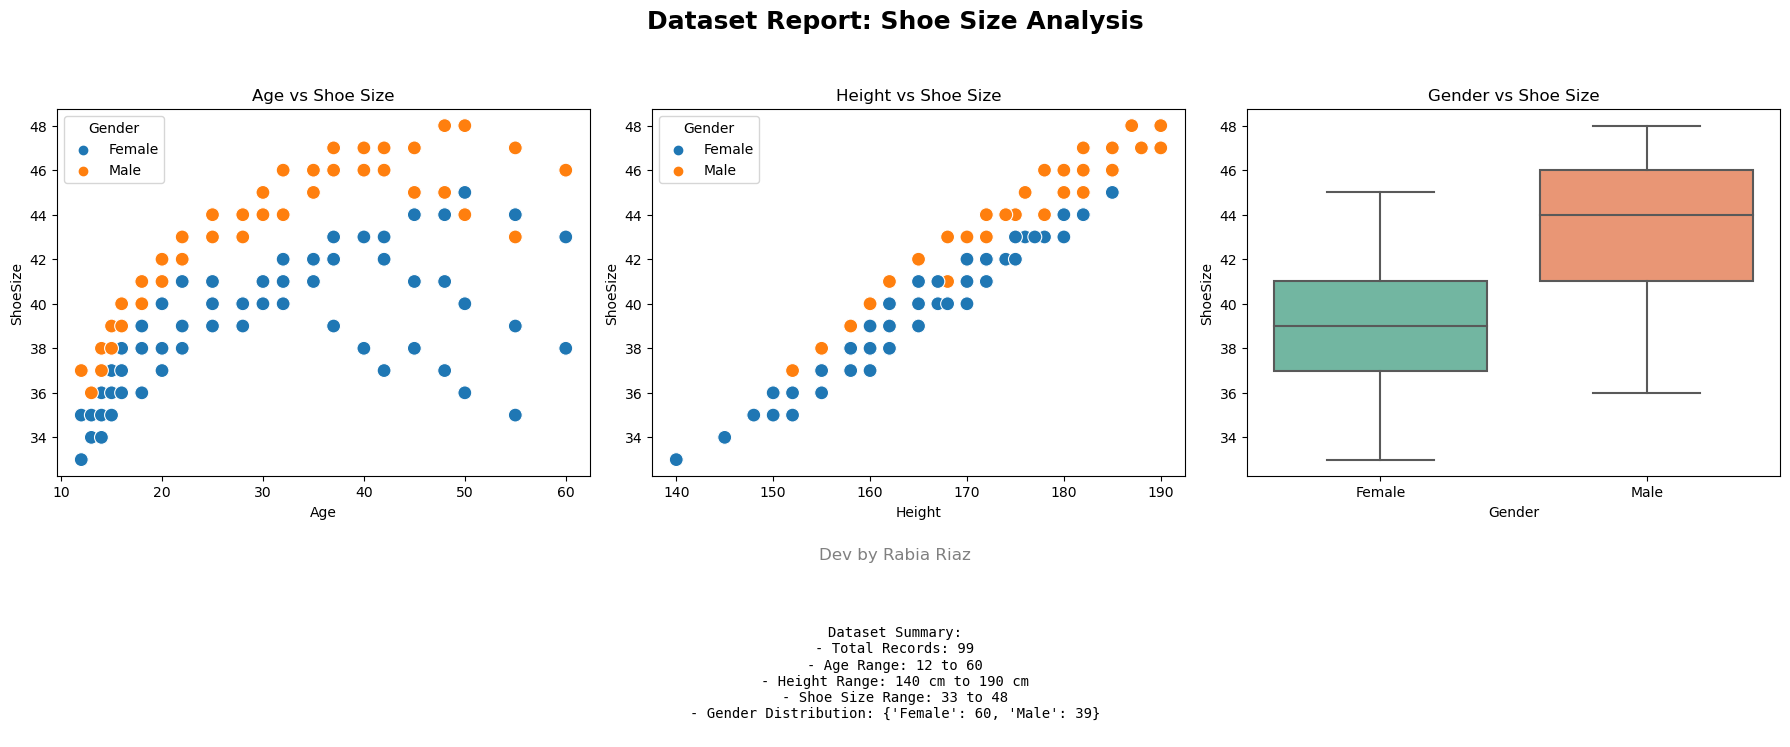

In [13]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Age vs ShoeSize
sns.scatterplot(data=df, x="Age", y="ShoeSize", hue="Gender", ax=axes[0], s=100)
axes[0].set_title("Age vs Shoe Size")

# Plot 2: Height vs ShoeSize
sns.scatterplot(data=df, x="Height", y="ShoeSize", hue="Gender", ax=axes[1], s=100)
axes[1].set_title("Height vs Shoe Size")

# Plot 3: Gender vs ShoeSize
sns.boxplot(data=df, x="Gender", y="ShoeSize", palette="Set2", ax=axes[2])
axes[2].set_title("Gender vs Shoe Size")

# Main Title
fig.suptitle("Dataset Report: Shoe Size Analysis", fontsize=18, fontweight="bold", y=1.05)

# Footer: Developer credit
fig.text(0.5, -0.05, "Dev by Rabia Riaz", ha="center", fontsize=12, color="gray")

# Dataset summary at bottom
summary = f"""
Dataset Summary:
- Total Records: {len(df)}
- Age Range: {df['Age'].min()} to {df['Age'].max()}
- Height Range: {df['Height'].min()} cm to {df['Height'].max()} cm
- Shoe Size Range: {df['ShoeSize'].min()} to {df['ShoeSize'].max()}
- Gender Distribution: {df['Gender'].value_counts().to_dict()}
"""
fig.text(0.5, -0.15, summary, ha="center", va="top", fontsize=10, family="monospace")

plt.tight_layout()
plt.savefig("assets/dataset_report.png", dpi=300, bbox_inches="tight")
plt.show()

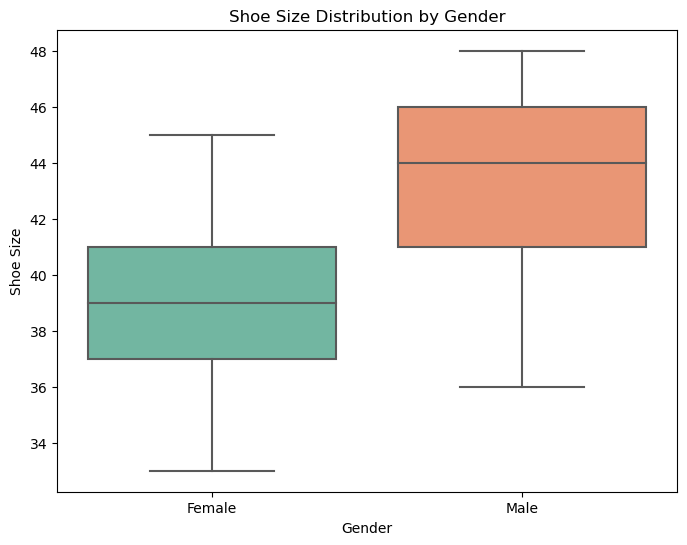

In [14]:
# Boxplot of shoe size by gender
plt.figure(figsize=(8,6))
sns.boxplot(x="Gender", y="ShoeSize", data=df, palette="Set2")

plt.title("Shoe Size Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Shoe Size")
plt.show()

# 4.Select the correct algorithm
<img src="assets/ml_map.svg" alt="ML Map" width="500"/>

# I am going to use linear Regression for this project

# 5.Train the Machine Learning Model

In [15]:
df.head(2)

,Age,Height,Gender,ShoeSize
0,12,150,Female,35
1,14,155,Female,36


## Encoding Gender Feature

In [16]:
## encoding gender (Male=1, Female=0)
le = LabelEncoder()
df["Gender"]= le.fit_transform(df["Gender"])

In [17]:
df.head()

,Age,Height,Gender,ShoeSize
0,12,150,0,35
1,14,155,0,36
2,13,152,0,35
3,15,160,0,37
4,16,162,0,38


In [18]:
#Save LabelEncoder to pkl
with open("label_encoder.pkl","wb") as f:
    pickle.dump(le, f)

## Train Test Split

In [19]:
#Features (X) and Target (y)
X = df[["Age", "Height", "Gender"]]
y = df["ShoeSize"]

In [20]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Training

In [21]:
# Train linear Regression
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression()

# 6. Test the Model in practice

In [23]:
#Prediction
y_pred = model.predict(X_test)

In [24]:
y_test, y_pred

(46    40
 96    45
 65    42
 94    44
 45    39
 16    38
 49    42
 42    37
 76    48
 56    40
 68    44
 57    39
 21    38
 35    45
 31    46
 66    43
 40    35
 91    42
 62    39
 4     38
 Name: ShoeSize, dtype: int64,
 array([39.52940117, 45.13609693, 40.88750644, 43.72457974, 38.68249086,
        38.50137507, 41.50552523, 36.6984922 , 47.92146859, 40.20307029,
        42.85575591, 39.29316319, 39.49961305, 45.63941729, 46.58869739,
        41.73441676, 34.68299514, 41.46615224, 38.90350778, 38.72973846]))

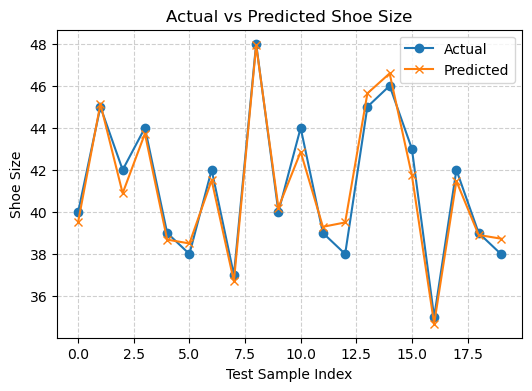

In [25]:
plt.figure(figsize=(6,4))
plt.plot(y_test.values, label="Actual", marker="o")
plt.plot(y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Shoe Size")
plt.xlabel("Test Sample Index")
plt.ylabel("Shoe Size")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# 7.Evaluation

In [26]:
print("Coefficients:" , model.coef_)
print()

Coefficients: [-0.0078746   0.29017804  1.33448147]



In [27]:
print("R^2 Score:" , r2_score(y_test, y_pred))

R^2 Score: 0.9587051842393888


In [28]:
print("RMSE:" , mean_squared_error(y_test, y_pred))

RMSE: 0.46085014388842094


# Save Model

In [29]:
#---Save Model---
with open("assets/model.pkl","wb") as f:
    pickle.dump(model, f)

# Test All Models

In [30]:
# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR



# List of models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

results = []

# Train & evaluate all models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    results.append((name, r2, rmse))

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R2_Score", "RMSE"])
results_df = results_df.sort_values(by="R2_Score", ascending=False)

print(results_df)

# Select best model
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name}")

               Model  R2_Score      RMSE
0  Linear Regression  0.958705  0.460850
1              Ridge  0.958528  0.462822
5  Gradient Boosting  0.932438  0.753990
2              Lasso  0.922048  0.869949
4      Random Forest  0.917260  0.923374
3      Decision Tree  0.882392  1.312500
6                SVR  0.529561  5.250101

Best Model: Linear Regression


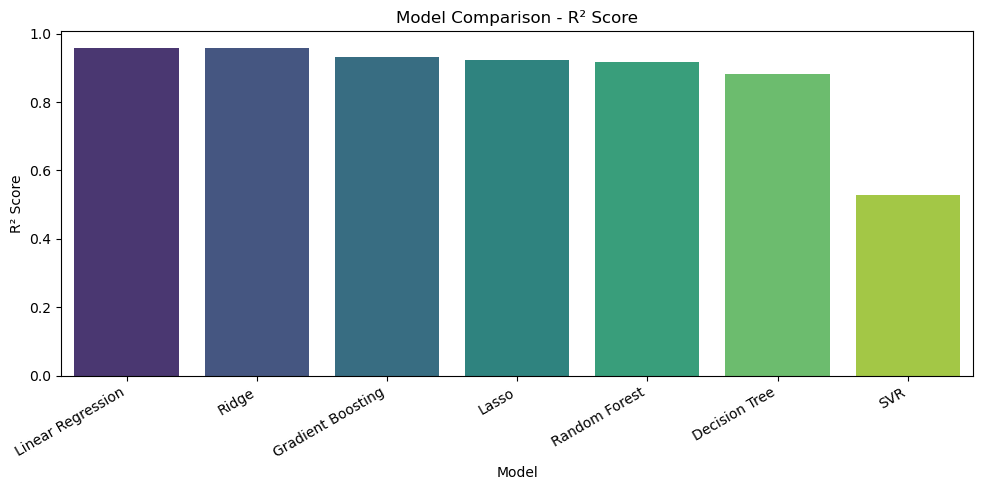

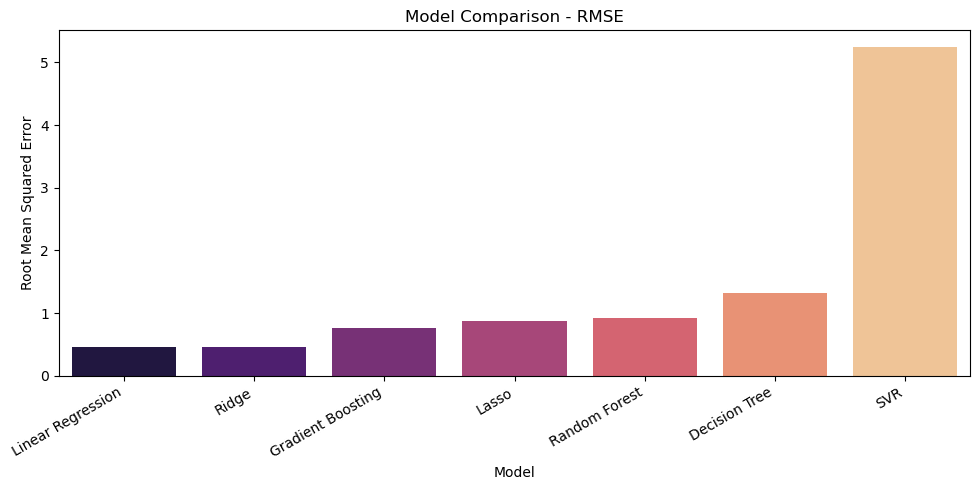

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Barplot of R² Scores
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="R2_Score", data=results_df, palette="viridis")
plt.xticks(rotation=30, ha="right")
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")
plt.tight_layout()
plt.show()

# Barplot of RMSE
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="RMSE", data=results_df, palette="magma")
plt.xticks(rotation=30, ha="right")
plt.title("Model Comparison - RMSE")
plt.ylabel("Root Mean Squared Error")
plt.tight_layout()
plt.show()
